# Import section

All necessary imports should be placed here.


In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from scipy.spatial.distance import cdist

## Data Import


In [2]:
x0_data = np.loadtxt("../data/nonlinear_vectorfield_data_x0.txt")
x1_data = np.loadtxt("../data/nonlinear_vectorfield_data_x1.txt")

delta_t = 0.01

# Task Implementations


## Methods


In [3]:
def finite_difference(dataset_1, dataset_2, delta_t):
    """
    Computes the finite difference between two datasets.

    Parameters:
    - dataset_1 (numpy.ndarray): The first dataset.
    - dataset_2 (numpy.ndarray): The second dataset.
    - delta_t (float): The time step or difference.

    Returns:
    - numpy.ndarray: The finite difference between the datasets.

    Example:
    ```python
    dataset_1 = np.array([1.0, 2.0, 3.0])
    dataset_2 = np.array([2.0, 4.0, 6.0])
    delta_t = 0.1
    result = finite_difference(dataset_1, dataset_2, delta_t)
    print(result)
    # Output: array([10., 20., 30.])
    ```

    Reference:
    - Finite Difference: https://en.wikipedia.org/wiki/Finite_difference

    """
    return (dataset_2 - dataset_1) / delta_t


def estimate_A(dataset_1, dataset_2, delta_t):
    """
    Estimates the matrix A in a linear system using least squares.

    Parameters:
    - dataset_1 (numpy.ndarray): The input dataset.
    - dataset_2 (numpy.ndarray): The output dataset.
    - delta_t (float): The time step.

    Returns:
    - numpy.ndarray: The estimated matrix A.

    Example:
    ```python
    dataset_1 = np.array([[1.0], [2.0], [3.0]])
    dataset_2 = np.array([[2.0], [4.0], [6.0]])
    delta_t = 0.1
    result = estimate_A(dataset_1, dataset_2, delta_t)
    print(result)
    # Output: array([[10.]])
    ```

    Note:
    - The function uses the finite_difference function to compute the derivatives.

    Reference:
    - Least Squares: https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html

    """
    derivatives = finite_difference(dataset_1, dataset_2, delta_t)
    return np.linalg.lstsq(dataset_1, derivatives, rcond=1e-5)[0]


def calculate_mean_squared_error(dataset_true, dataset_predicted):
    """
    Calculates the mean squared error between two datasets.

    Parameters:
    - dataset_true (numpy.ndarray): The true dataset.
    - dataset_predicted (numpy.ndarray): The predicted dataset.

    Returns:
    - float: The mean squared error.

    Example:
    ```python
    dataset_true = np.array([1.0, 2.0, 3.0])
    dataset_approx = np.array([1.5, 2.5, 3.5])
    result = calculate_mean_squared_error(dataset_true, dataset_approx)
    print(result)
    # Output: 0.25
    ```

    Reference:
    - Mean Squared Error: https://en.wikipedia.org/wiki/Mean_squared_error

    """
    return np.mean(np.sum((dataset_true - dataset_predicted) ** 2, axis=1))


def linear_system(t, x, A):
    """
    Represents a linear system of differential equations.

    Parameters:
    - t (float): The current time for the solve_ivp method.
    - x (numpy.ndarray): The state vector.
    - A (numpy.ndarray): The matrix A.

    Returns:
    - numpy.ndarray: The derivatives of the state vector.

    Example:
    ```python
    t = 0.0
    x = np.array([1.0, 2.0])
    A = np.array([[2.0, -1.0], [1.0, 3.0]])
    result = linear_system(t, x, A)
    print(result)
    # Output: array([1., 5.])
    ```

    Note:
    - The function represents a linear system dx/dt = A*x and used to solve the linear equation.

    Reference:
    - Linear System: https://en.wikipedia.org/wiki/Linear_differential_equation

    """
    return A.dot(x)


def solve_linear_equation(A, x_0, delta_t):
    """
    Solves a linear system of differential equations using solve_ivp from the scipy library.

    Parameters:
    - A (numpy.ndarray): The matrix A in dx/dt = A*x.
    - x_0 (numpy.ndarray): The initial state vector.
    - delta_t (float): The time step.

    Returns:
    - numpy.ndarray: The state vector at time delta_t.

    Example:
    ```python
    A = np.array([[2.0, -1.0], [1.0, 3.0]])
    x_0 = np.array([1.0, 2.0])
    delta_t = 1.0
    result = solve_linear_equation(A, x_0, delta_t)
    print(result)
    # Output: array([ 2.21733722, 12.76570859])
    ```

    Note:
    - The function uses solve_ivp to solve a linear system of differential equations.

    Reference:
    - solve_ivp: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

    """
    t_eval = np.linspace(0, delta_t, 100)
    sol = solve_ivp(
        linear_system, (0, delta_t), x_0, args=(A,), t_eval=t_eval, dense_output=True
    )
    return sol.sol(delta_t)

In [4]:
def chose_centers(x, n_bases):
    """
    Chooses random centers from the input data.

    Parameters:
    - x (numpy.ndarray): Input data.
    - n_bases (int): Number of centers to choose.

    Returns:
    - numpy.ndarray: Randomly chosen centers.

    Example:
    ```python
    x = np.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    n_bases = 2
    result = chose_centers(x, n_bases)
    print(result)
    # Output: array([[1., 2.],
    #                [3., 4.]])
    ```

    Reference:
    - Random Sampling: https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

    """
    centers = x[np.random.choice(range(x.shape[0]), replace=False, size=n_bases)]
    return centers


def rbf(x, centers, eps):
    """
    Computes the Radial Basis Function (RBF) values.

    Parameters:
    - x (numpy.ndarray): Input data.
    - centers (numpy.ndarray): RBF centers generated from the chose_centers function.
    - eps (float): Epsilon parameter of RBF function.

    Returns:
    - numpy.ndarray: RBF values.

    Example:
    ```python
    x = np.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    centers = chose_centers(x, 2)
    eps = 1.0
    result = rbf(x, centers, eps)
    print(result)
    # Output: array([[1.        , 0.01831564],
    #                [0.01831564, 1.        ],
    #                [0.00012341, 0.01831564]])
    ```

    Reference:
    - Radial Basis Function: https://en.wikipedia.org/wiki/Radial_basis_function

    """
    phi = np.exp(-cdist(x, centers) ** 2 / eps**2)
    return phi


def rbf_system(t, x, centers, C, eps):
    """
    Represents a Radial Basis Function (RBF) system of differential equations.

    Parameters:
    - t (float): The current time for the solve_ivp method.
    - x (numpy.ndarray): The state vector.
    - centers (numpy.ndarray): RBF centers.
    - C (numpy.ndarray): Coefficient matrix.
    - eps (float): Epsilon parameter of RBF function.

    Returns:
    - numpy.ndarray: The derivatives of the state vector.

    Example:
    ```python
    t = 0.0
    y = np.array([1.0, 2.0])
    centers = np.array([[1.0, 2.0], [3.0, 4.0]])
    C = np.array([[2.0], [1.0]])
    eps = 1.0
    result = rbf_system(t, y, centers, C, eps)
    print(result)
    # Output: array([[0.01831564],
    #                [0.00012341]])
    ```

    Reference:
    - Radial Basis Function: https://en.wikipedia.org/wiki/Radial_basis_function

    """
    x = x.reshape(1, x.shape[-1])
    phi = np.exp(-cdist(x, centers) ** 2 / eps**2)
    return phi @ C


def solve_rbf_system(x_0, delta_t, centers, C, eps):
    """
    Solves a Radial Basis Function (RBF) system of differential equations using solve_ivp.

    Parameters:
    - x_0 (numpy.ndarray): The initial state vector.
    - delta_t (float): The time step.
    - centers (numpy.ndarray): RBF centers.
    - C (numpy.ndarray): Coefficient matrix.
    - eps (float): Epsilon parameter of RBF function.

    Returns:
    - numpy.ndarray: The state vector at time delta_t.

    Example:
    ```python
    x_0 = np.array([1.0, 2.0])
    delta_t = 1.0
    centers = np.array([[1.0, 2.0], [3.0, 4.0]])
    C = np.array([[2.0], [1.0]])
    eps = 1.0
    result = solve_rbf_system(x_0, delta_t, centers, C, eps)
    print(result)
    # Output: array([2.69663128, 1.96498186])
    ```

    Reference:
    - solve_ivp: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

    """
    t_eval = np.linspace(0, delta_t, 100)
    sol = solve_ivp(
        rbf_system,
        (0, delta_t),
        x_0,
        args=(centers, C, eps),
        t_eval=t_eval,
        dense_output=True,
    )
    return sol.sol(delta_t)

## Task 1


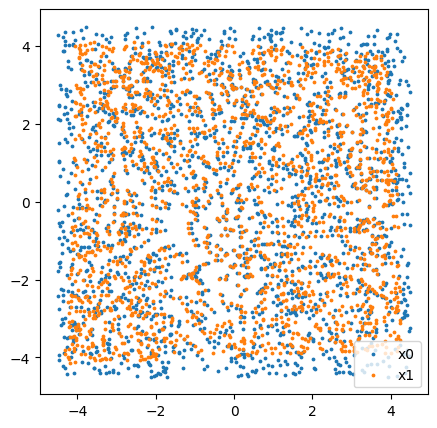

In [5]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.scatter(x0_data[:, 0], x0_data[:, 1], s=3, label="x0")
ax.scatter(x1_data[:, 0], x1_data[:, 1], s=3, label="x1")
# ax.set_title("Original $x_0$ and $x_1$ datasets")
ax.legend()

In [6]:
A = estimate_A(x0_data, x1_data, delta_t)
V = finite_difference(x0_data, x1_data, delta_t)

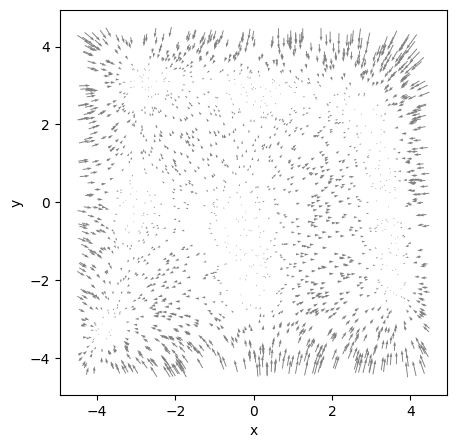

In [7]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.quiver(x0_data[:, 0], x0_data[:, 1], V[:, 0], V[:, 1], color="grey")
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_title("Vector field with finite-difference")
plt.show()

In [8]:
x1_hat = np.array([solve_linear_equation(A, x_0, delta_t) for x_0 in x0_data])
print(
    "Mean squared error for linear system: ",
    calculate_mean_squared_error(x1_data, x1_hat),
)

Mean squared error for linear system:  0.037291879159319974


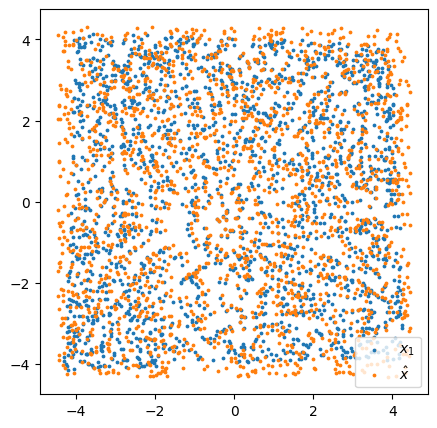

In [9]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.scatter(x1_data[:, 0], x1_data[:, 1], s=3, label="$x_1$")
ax.scatter(x1_hat[:, 0], x1_hat[:, 1], s=3, label="$\hat{x}$")
# ax.set_title("Original $x_1$ and $\hat{x}$ comparison")
ax.legend()

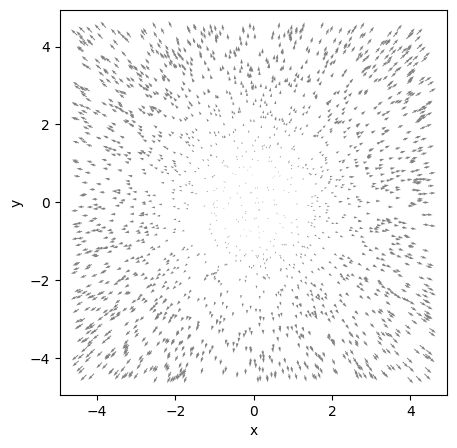

In [10]:
fig3 = plt.figure(figsize=(5, 5))
ax3 = fig3.add_subplot()
ax3.quiver(x0_data[:, 0], x0_data[:, 1], x1_hat[:, 0], x1_hat[:, 1], color="grey")
ax3.set_xlabel("x")
ax3.set_ylabel("y")
# ax3.set_title("Original $x_1$ and $\hat{x}$ vector field")
plt.show()

## Task 2


In [11]:
num_center_list = list(range(100, 1001, 50))
eps_list = [0.1, 0.3, 0.5, 0.7, 1]
V = finite_difference(x0_data, x1_data, delta_t)

In [12]:
best_result = math.inf
best_center_count = num_center_list[0]
best_prediction = None
best_centers = None
best_C = None
best_eps = eps_list[0]

for eps in eps_list:
    for num_centers in num_center_list:
        centers = chose_centers(x0_data, num_centers)
        phi = rbf(x0_data, centers, eps)
        C = np.linalg.lstsq(a=phi, b=V, rcond=1e-5)[0]

        x1_hat = np.array(
            [solve_rbf_system(x_0, delta_t, centers, C, eps) for x_0 in x0_data]
        )
        mse_score = calculate_mean_squared_error(x1_data, x1_hat)

        if mse_score < best_result:
            best_result = mse_score
            best_center_count = num_centers
            best_prediction = x1_hat
            best_centers = centers
            best_C = C
            best_eps = eps
        # print(f"Number of centers: {num_centers} and epsilon: {eps} with MSE score: {mse_score}")
    # print("-----")

print(
    f"Best number of center count: {best_center_count} and $\epsilon$: {best_eps} with MSE score: {best_result}"
)

Best number of center count: 200 and $\epsilon$: 1 with MSE score: 0.0008199796658471104


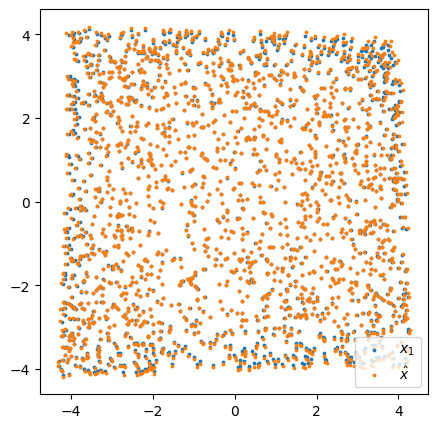

In [13]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.scatter(x1_data[:, 0], x1_data[:, 1], s=3, label="$x_1$")
ax.scatter(best_prediction[:, 0], best_prediction[:, 1], s=3, label="$\hat{x}$")
# ax.set_title("Original $x_1$ and $\hat{x}$ comparison")
ax.legend()

## Task 3


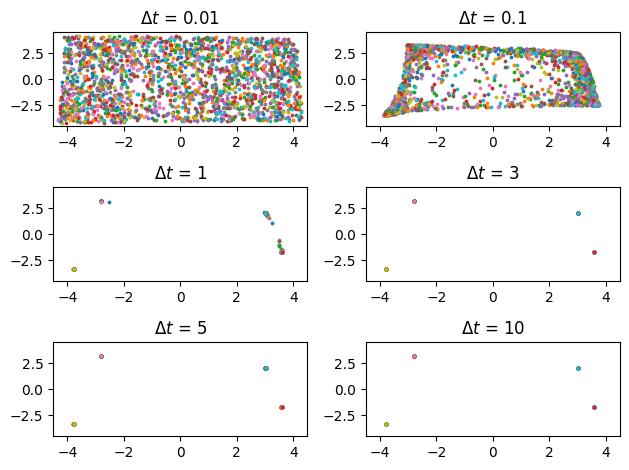

In [14]:
delta_values = [0.01, 0.1, 1, 3, 5, 10]
fig, axs = plt.subplots(3, 2)
axs = axs.flatten()

for i in range(6):
    ax = axs[i]
    ax.set_xlim(-4.5, 4.5)
    ax.set_ylim(-4.5, 4.5)
    ax.set_title(f"$\Delta t$ = {delta_values[i]}")

    for j in range(len(x0_data)):
        sol = solve_rbf_system(
            x0_data[j], delta_values[i], best_centers, best_C, best_eps
        )
        ax.scatter(sol[0], sol[1], s=3)

# fig.suptitle('RBF system representation with different delta ')
plt.tight_layout()
plt.show()